In [1]:
import pandas as pd

from geopy.geocoders import Nominatim

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [2]:
data = pd.read_excel('data_ford_price.xlsx') 

# Обработка географических данных

In [12]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Создаем геокодер с указанием User-Agent
#geolocator = Nominatim(user_agent="geoapiExercises")

# Создаем геокодер с указанием User-Agent
geolocator = Nominatim(user_agent="my_application")


In [17]:
from geopy.geocoders import Nominatim
import time

# Создаем геокодер с указанием User-Agent
geolocator = Nominatim(user_agent="my_application")

# Получаем координаты
Latitude = str(data['lat'][0])
Longitude = str(data['long'][0])

# Добавляем задержку
time.sleep(1)

# Используем требуемый формат
location = geolocator.reverse(Latitude+","+Longitude)

print(location)

# Получаем raw данные
if location:
    address = location.raw['address']
    #print("Адрес:", address)
    
    print("\nОтдельные компоненты адреса:")
    for key, value in address.items():
        print(f"{key}: {value}")
else:
    print("Не удалось получить информацию о местоположении")

Fort Henry Drive, Kingsport, Sullivan County, East Tennessee, Tennessee, 37663, United States

Отдельные компоненты адреса:
road: Fort Henry Drive
city: Kingsport
county: Sullivan County
region: East Tennessee
state: Tennessee
ISO3166-2-lvl4: US-TN
postcode: 37663
country: United States
country_code: us


In [18]:
address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'region': 'East Tennessee',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

### Задание 7.2

1 point possible (graded)

Найдите почтовый код шестого объекта выборки.

97216

In [19]:
# Получаем координаты
Latitude = str(data['lat'][5])
Longitude = str(data['long'][5])

# Добавляем задержку
time.sleep(1)

# Используем требуемый формат
location = geolocator.reverse(Latitude+","+Longitude)

print(location)

# Получаем raw данные
if location:
    address = location.raw['address']
    #print("Адрес:", address)
    
    print("\nОтдельные компоненты адреса:")
    for key, value in address.items():
        print(f"{key}: {value}")
else:
    print("Не удалось получить информацию о местоположении")

print(f'Postcode 6-th object: {address["postcode"]}')


E and J Motors, 622, Southeast 82nd Avenue, Montavilla, Portland, Multnomah County, Oregon, 97216, United States

Отдельные компоненты адреса:
shop: E and J Motors
house_number: 622
road: Southeast 82nd Avenue
suburb: Montavilla
city: Portland
county: Multnomah County
state: Oregon
ISO3166-2-lvl4: US-OR
postcode: 97216
country: United States
country_code: us
Postcode 6-th object: 97216


# Отрисовка карты

In [21]:
!pip install geopandas
!pip install shapely

In [22]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

Ошибка возникает потому, что метод gpd.datasets.get_path() был удален в GeoPandas 1.0. Давайте исправим код, используя прямую загрузку данных:

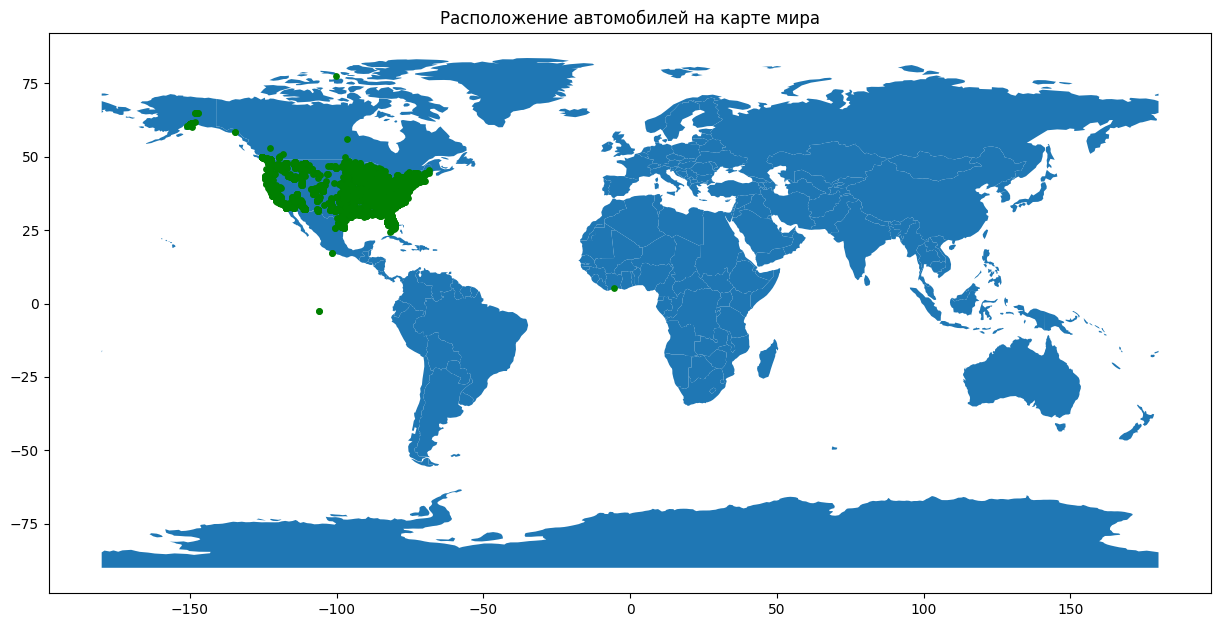

In [25]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

# Создаем геометрию из координат
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)

# Загружаем данные карты мира напрямую из Natural Earth
world = gpd.read_file('https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson')

# Создаем визуализацию
fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax)
gdf.plot(ax=ax, marker='o', color='green', markersize=15)

plt.title('Расположение автомобилей на карте мира')
plt.show()

In [23]:
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)  
 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [24]:
import plotly.express as px
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()

В этом коде используется библиотека Plotly Express (px) для создания интерактивной карты. Параметр hover_name="price" указывает, что при наведении курсора на точку будет отображаться цена автомобиля.
Давайте сделаем более информативную версию:

In [26]:
import plotly.express as px

# Создаем интерактивную карту с дополнительной информацией
fig = px.scatter_geo(
    data,
    lat='lat',
    lon='long',
    hover_name="price",  # основная информация при наведении
    hover_data={         # дополнительная информация при наведении
        "year": True,    # показывать год
        "condition": True,  # показывать состояние
        "lat": False,    # скрыть широту
        "long": False    # скрыть долготу
    },
    color="price",      # цвет точек зависит от цены
    size="price",       # размер точек зависит от цены
    title="Интерактивная карта цены автомобиля в зависимости от локации"
)

# Настраиваем внешний вид
fig.update_layout(
    title_x=0.5,        # центрируем заголовок
    showlegend=True,    # показываем легенду
)

fig.show()